<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0_4%EA%B0%95_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R을 이용한 실습

## ARIMA모형
>
arima.sim 함수를 이용해 ARIMA(1, 1, 1)모형 계열(δ=0, φ, θ=0.6)을 생성하고 동 계열을 1970년 이후의 분기계열을 만들고 이를 바탕으로 시계열도표, 스펙트럼, 상관도표, 부분상관도표를 생성하는 코드 작성

시계열도표 : plot함수

스펙트럼 : spectrum함수

상관도표 : acf함수

부분상관도표 : pacf함수

In [ ]:
#ARIMA(1, 1, 1)모형 시계열 작성(δ=0, φ,θ=0.6)
arimasim <- ts(arima.sim(list(order = c(1, 1, 1), ar=0.6, ma=0.6), n=154), start = 1970, freq = 4)
head(arimasim)

[1]  0.0000000  1.6891780  1.5534449  1.1780931  0.3571545 -0.7097140

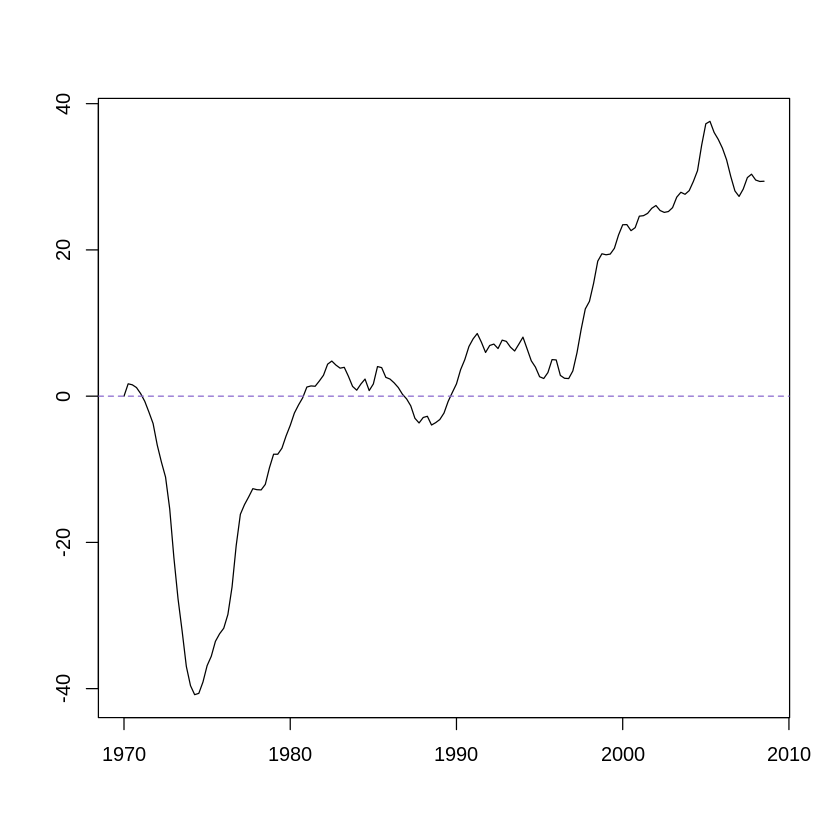

In [ ]:
#ARIMA(1, 1, 1)모형의 시계열도표
plot(arimasim, main = " ", xlab = " ", ylab = " ", col = "black")
abline(h=0, lty = 2, col = "mediumpurple3")

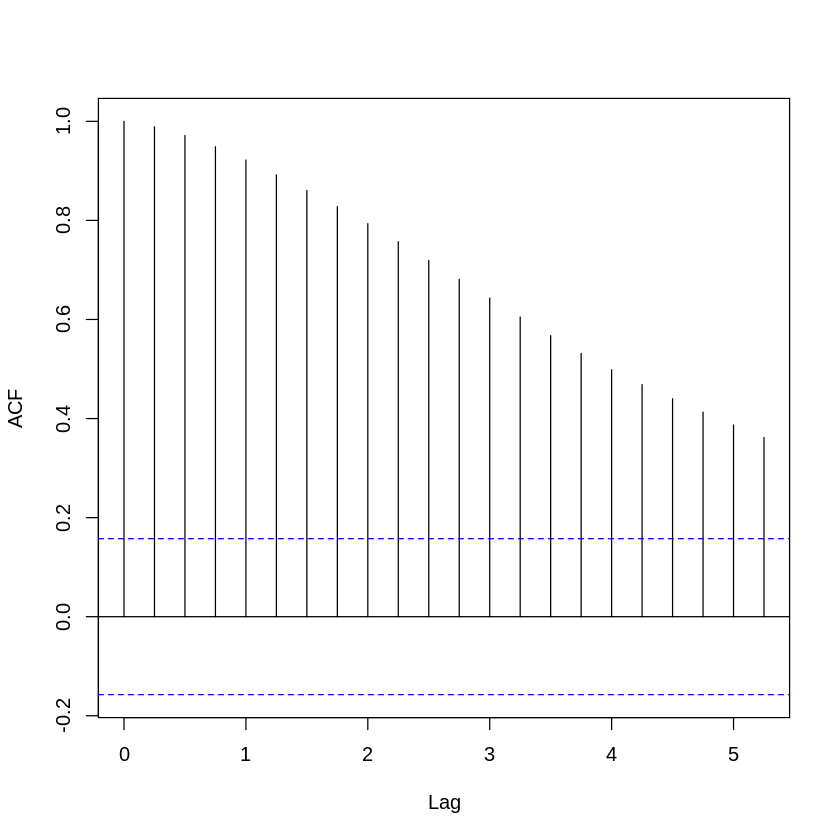

In [ ]:
# ARIMA(1, 1, 1)모형의 상관도표
acf(arimasim, main =" ")

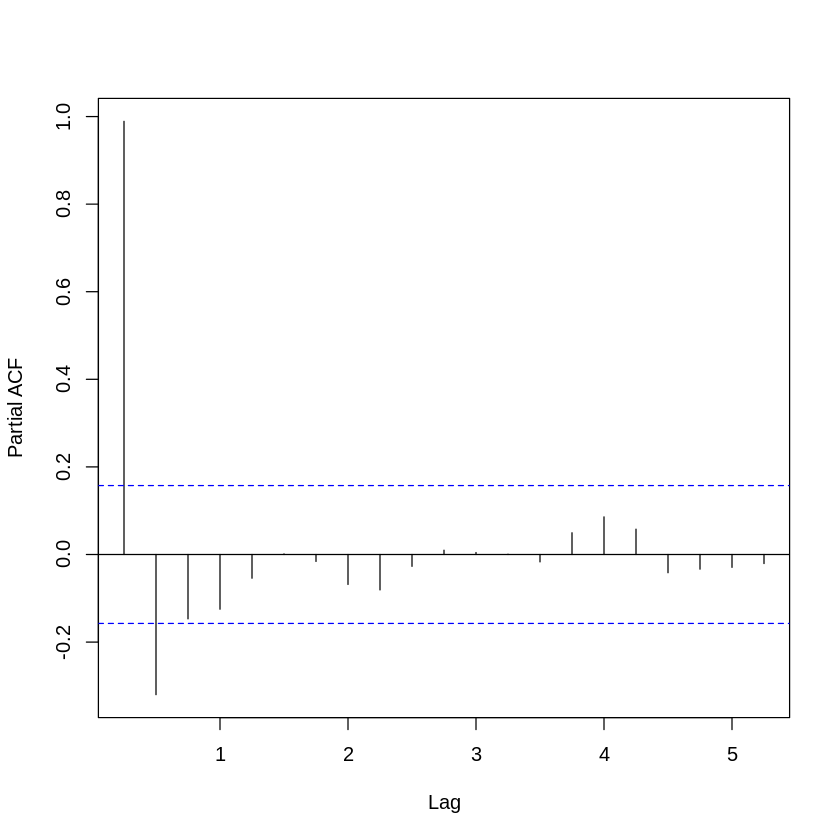

In [ ]:
#ARIMA(1, 1, 1)모형의 부분상관도표
pacf(arimasim, main = "")

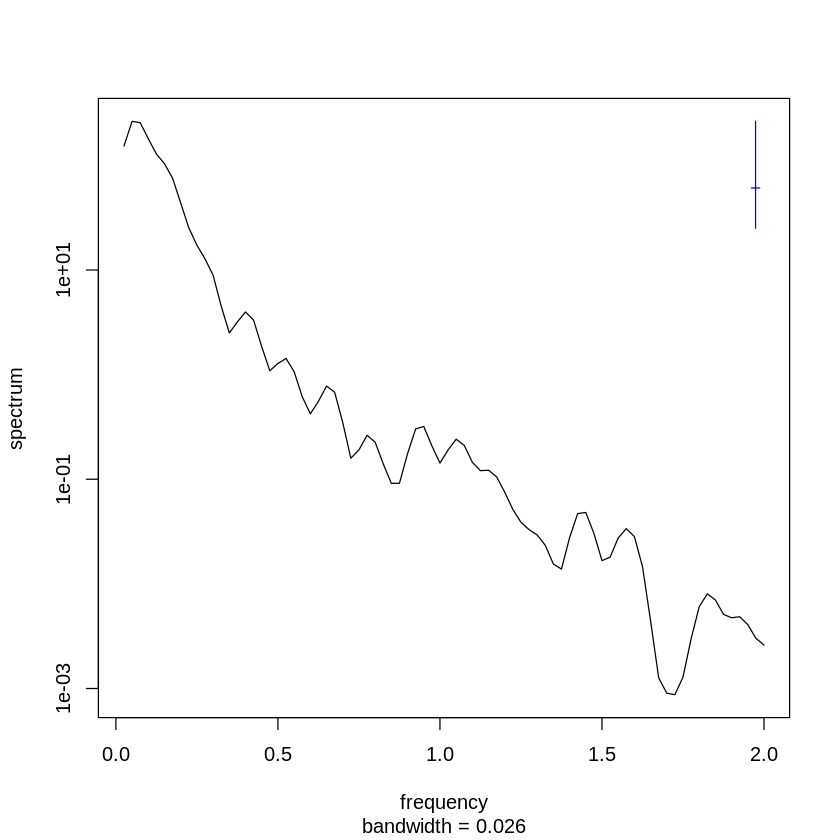

In [ ]:
#ARIMA(1, 1, 1)모형의 스펙트럼
spectrum(arimasim, spans = c(3, 3), main = "")

##TAR 모형 시계열
TAR모형 시계열 생성 : TSA 패키지-tar.sim함수

시차 그래프 작성 : tsDyn패키지,
                   sm패키지

Phi1, Phi2 : AR계수

p : AR차수

d : 지연시차

thd : 임계치

n=176 : 생성된 표본수

sigma1, sigma2 : 오차항의 표준편차

$y : 생성된 값 중 시계열만 선택함

autoparis : 시차변수와 산점도를 그리는 함수

In [ ]:
#패키지 가져오기
install.packages("tsDyn")
library(tsDyn)
install.packages("sm")
library(sm)
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#TAR모형 시계열 생성
set.seed(5) #난수생성시 처음 시작값을 주어 매번 같은 값이 나오게 하는 함수
tarsim <- tar.sim(n=176, Phi1 = c(0, 0.7), Phi2=c(0, -0.9), p = 1, d = 1, sigma1 = 1, thd = 0.5, sigma2 =2)$y
head(tarsim)

[1] -1.2797922  0.3339713  0.2383324 -1.1277749 -1.1866038  0.9088593

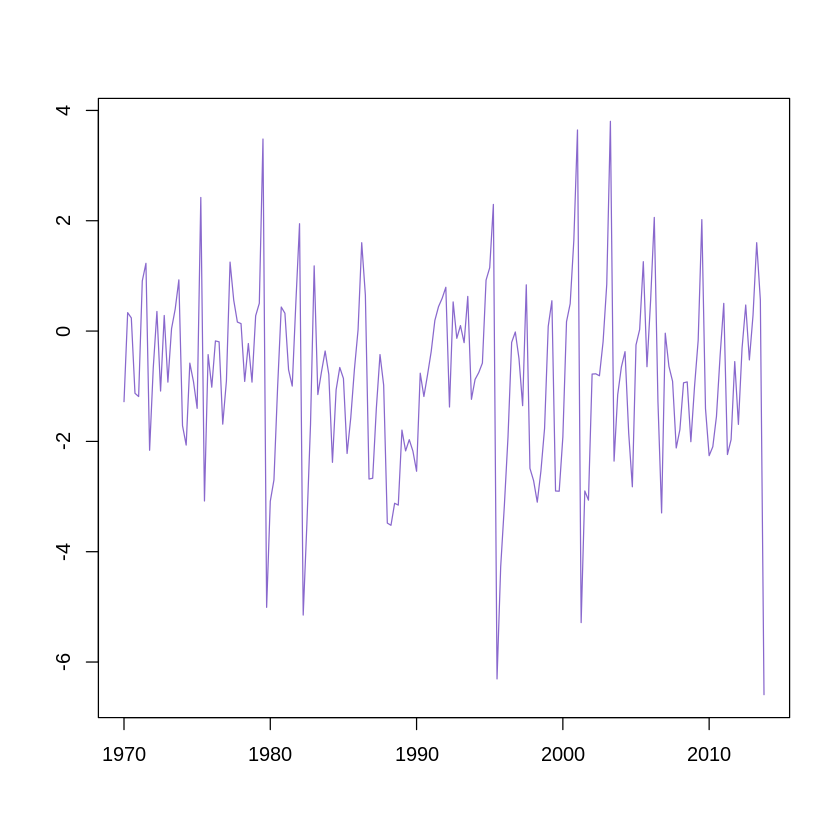

In [ ]:
#TAR모형 시계열도표
plot(ts(tarsim, start=1970, frequency = 4), xlab= " ", ylab = " ", col = "mediumpurple3")

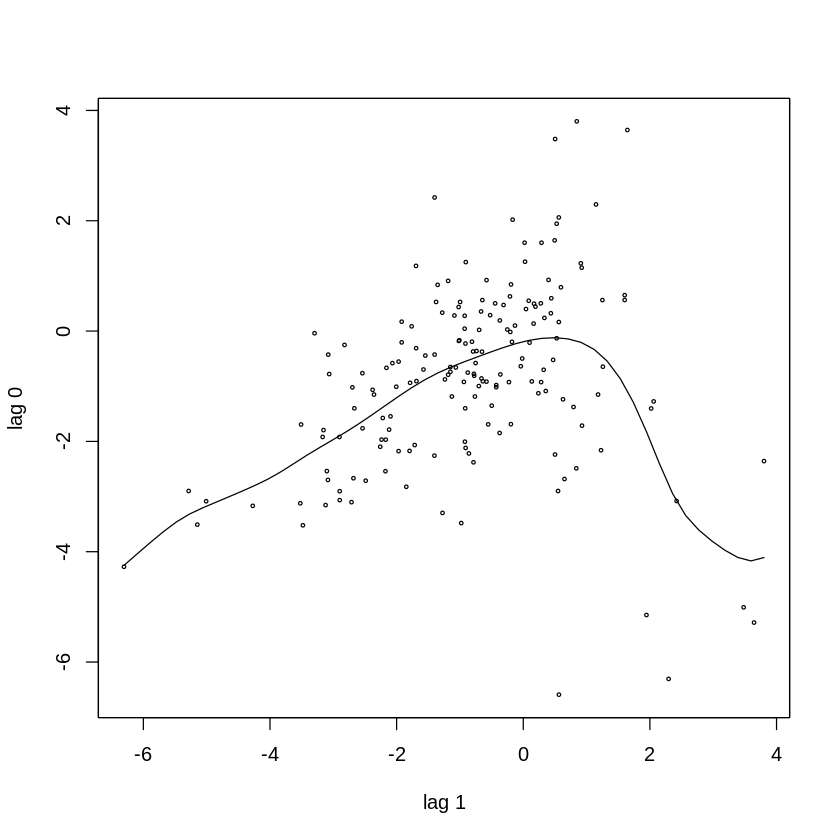

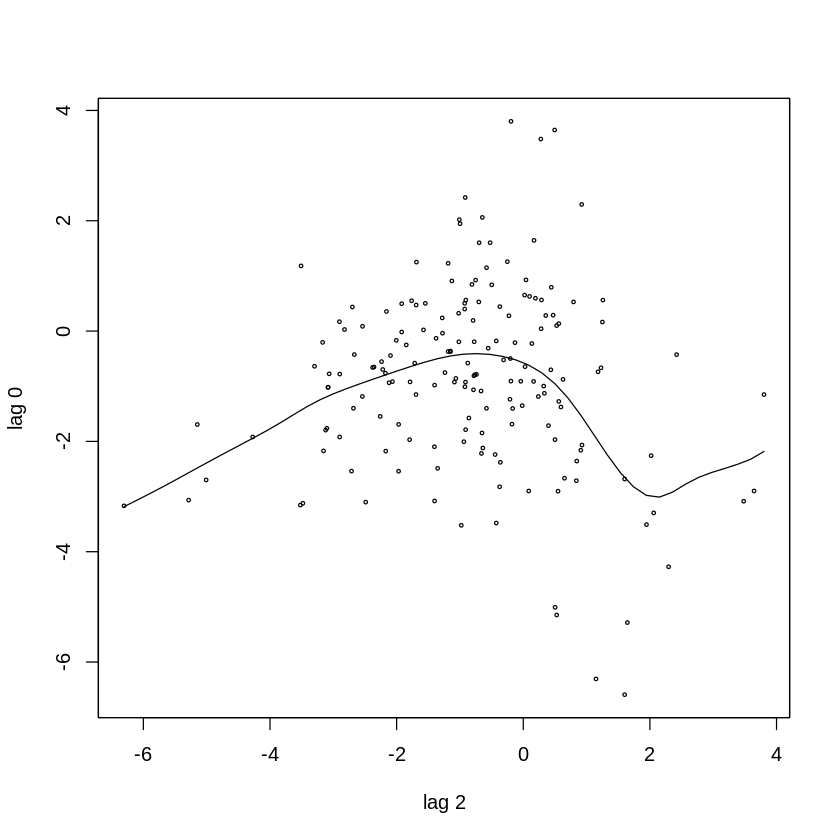

In [ ]:
#시차변수와 산점도
autopairs(tarsim, lag=1, type = "regression")
autopairs(tarsim, lag=2, type = "regression")

##GARCH모형 시계열, 상관도표, 부분상관도표

GARCH모형 시계열 생성 : fGarch 패키지

ARCH(2)모형 지정 : garchSpec함수

ARCH(2)모형을 이용해 176개 시계열 생성 : garchSim함수

시계열도표 : plot함수

상관도표 : acf 함수

부분상관도표 : pacf 함수


In [ ]:
#패키지 가져오기
install.packages("fGarch")
library(fGarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gss’, ‘stabledist’, ‘timeSeries’, ‘fBasics’, ‘fastICA’


Loading required package: timeDate


Attaching package: ‘timeDate’


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


Loading required package: timeSeries

Loading required package: fBasics



In [ ]:
#GARCH모형 시계열 생성
set.seed(5)
spec <- garchSpec(model = list(alpha = c(0.5, 0.4), beta = 0))
garchsim <- garchSim(spec, n=176)

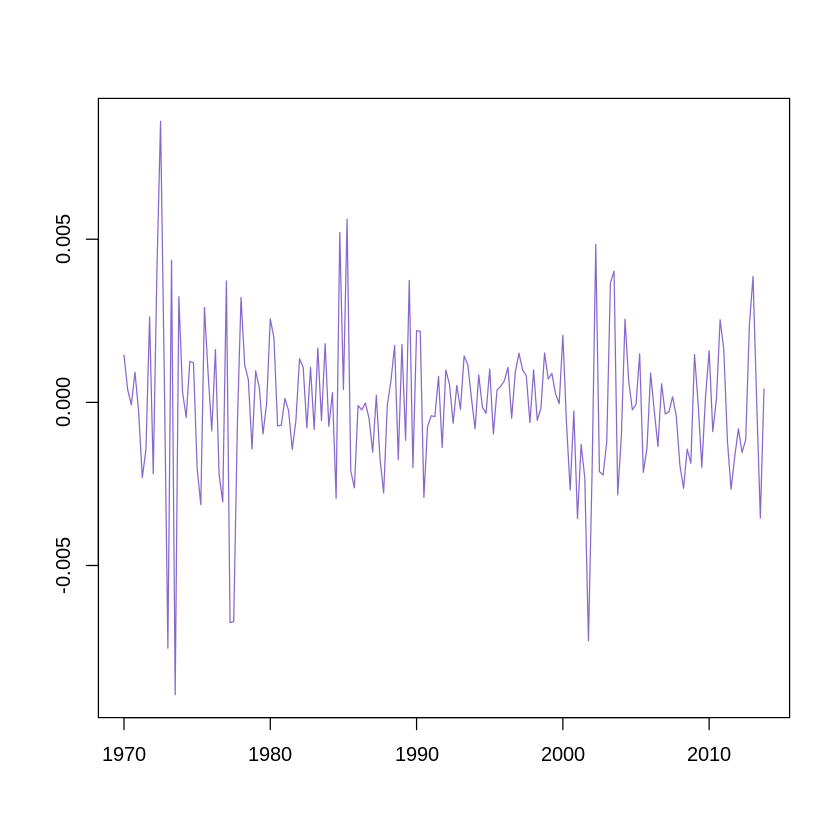

In [ ]:
# GARCH모형 시계열의 시계열도표
plot(ts(garchsim, start = 1970, frequency = 4), xlab = "", ylab = "", col = "mediumpurple3")

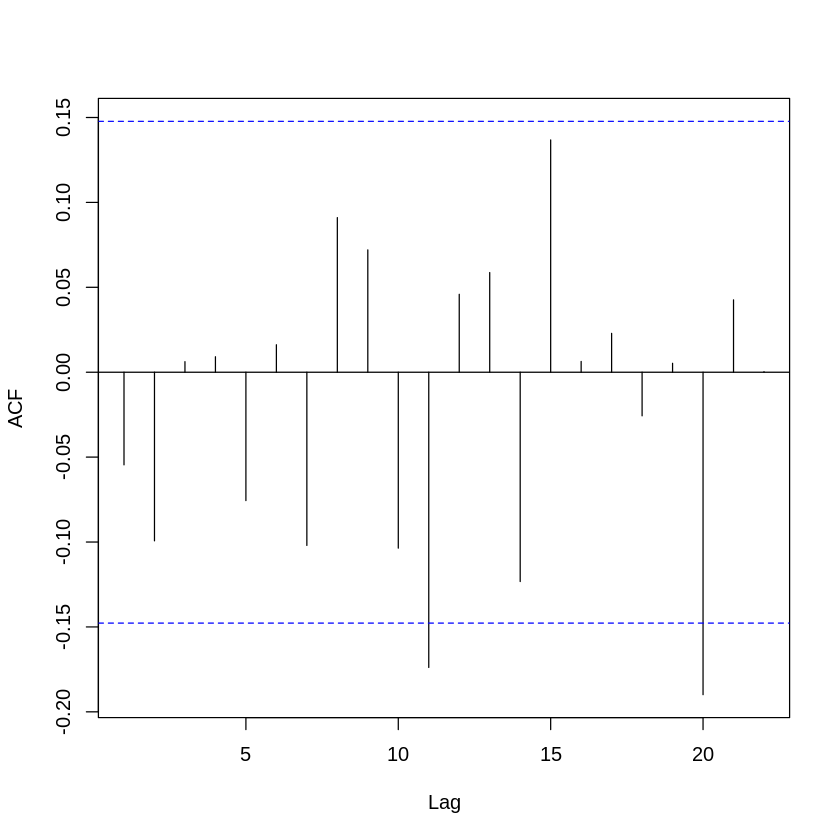

In [ ]:
#GARCH모형 시계열의 상관도표
acf(garchsim, main = "")

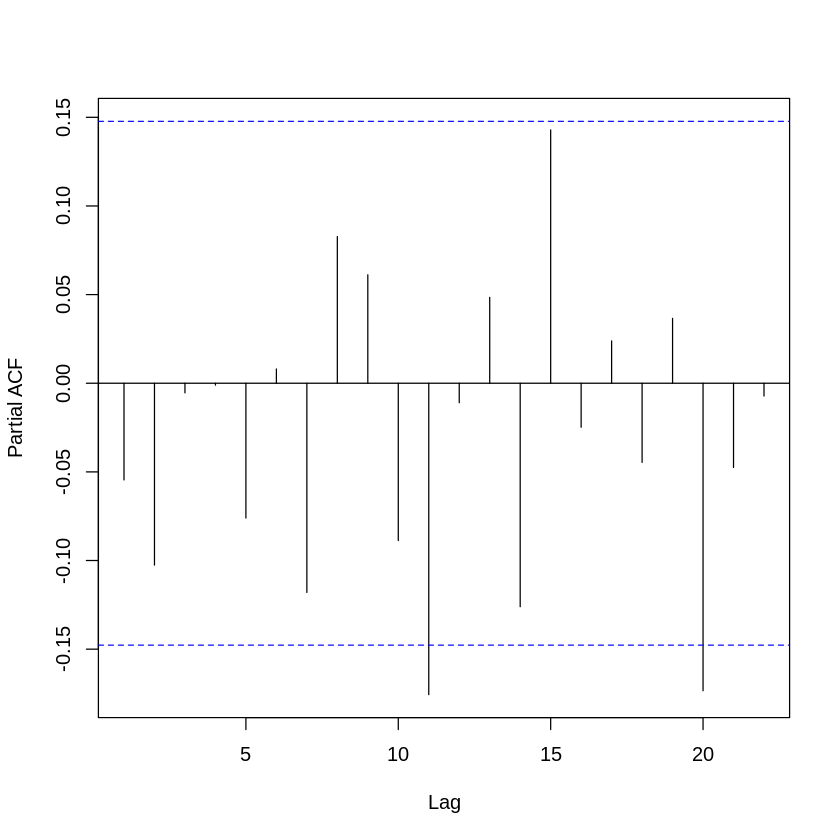

In [ ]:
#GARCH모형 시계열의 부분상관도표
pacf(garchsim, main = "")

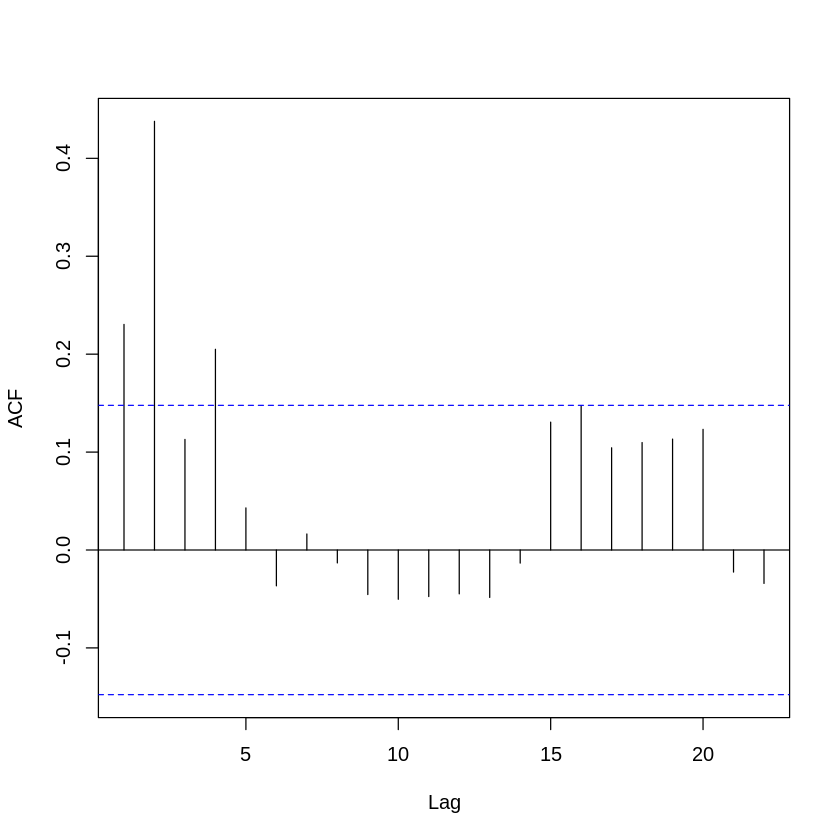

In [ ]:
#GARCH모형의 제곱 상관도표
acf(garchsim^2, main = "")

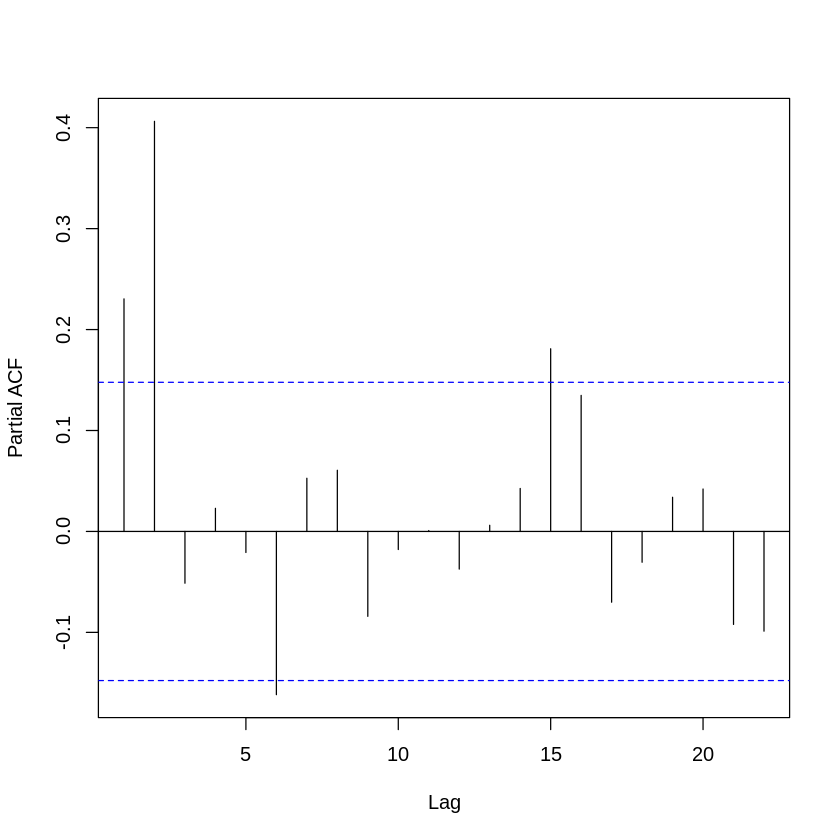

In [ ]:
#GARCH모형의 제곱 부분상관도표
pacf(garchsim^2, main = "")